In [1]:
# Importação das bibliotecas
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import shapely

In [2]:
gdf_curitiba = gpd.read_file('../dados/Curvas_de_nivel_new')

gdf_curitiba.head()

,Id,Layer,Elevation,geometry
0,0,RE_CURVA_INTERMEDIARIA,988.0,"LINESTRING Z (672258.591 7194609.551 988.000, ..."
1,0,RE_CURVA_INTERMEDIARIA,987.0,"LINESTRING Z (672260.913 7194629.120 987.000, ..."
2,0,RE_CURVA_INTERMEDIARIA,949.0,"LINESTRING Z (671900.606 7193639.875 949.000, ..."
3,0,RE_CURVA_INTERMEDIARIA,966.0,"LINESTRING Z (671815.059 7193583.941 966.000, ..."
4,0,RE_CURVA_INTERMEDIARIA,972.0,"LINESTRING Z (672069.527 7193814.317 972.000, ..."


In [3]:
list(gdf_curitiba["geometry"][0].coords)

[(672258.5913295895, 7194609.5509959, 988.0),
 (672260.9968938993, 7194601.1255030045, 988.0),
 (672262.3438762604, 7194598.889909675, 988.0),
 (672262.9815314502, 7194596.1614095, 988.0),
 (672261.8635295965, 7194593.479401046, 988.0),
 (672260.4185319807, 7194589.916999846, 988.0),
 (672260.8386106541, 7194585.952106614, 988.0),
 (672261.7010249688, 7194583.453387762, 988.0),
 (672261.7227613496, 7194583.165528135, 988.0),
 (672260.8891470245, 7194580.153716715, 988.0),
 (672259.2754412254, 7194577.557962789, 988.0),
 (672258.0122893188, 7194574.932427168, 988.0),
 (672257.326785644, 7194572.13985581, 988.0),
 (672257.3742121113, 7194568.930501842, 988.0),
 (672255.5669083745, 7194564.703657143, 988.0),
 (672254.1074533843, 7194563.60766066, 988.0)]

<AxesSubplot: >

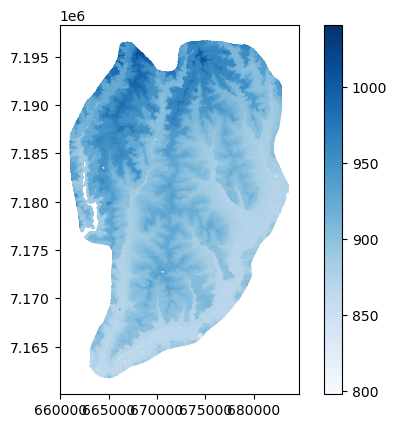

In [4]:
gdf_curitiba.plot(column="Elevation", cmap="Blues", legend=True)

In [5]:
df_places = gpd.read_file('../dados/hex8_data_geometry_curitiba3.geojson')

gdf = gpd.GeoDataFrame(
    gdf_curitiba)
gdf = gdf.to_crs(df_places.crs)


In [6]:
gdf = df_places.sjoin(gdf)

In [7]:
gdf_curitiba_hex = gdf
gdf_curitiba_hex.head()

,date,score,hex,NOME,geometry,index_right,Id,Layer,Elevation
0,2020-05-18,100,88a831acc7fffff,BAIRRO NOVO,"POLYGON ((-49.27456 -25.53764, -49.27041 -25.5...",26422,0,RE_CURVA_MESTRA,905.0
1,2020-03-11,100,88a831ace1fffff,BAIRRO NOVO,"POLYGON ((-49.25623 -25.53586, -49.25208 -25.5...",26422,0,RE_CURVA_MESTRA,905.0
3,2020-07-12,100,88a831acc5fffff,BAIRRO NOVO,"POLYGON ((-49.26869 -25.54399, -49.26454 -25.5...",26422,0,RE_CURVA_MESTRA,905.0
4,2020-04-25,99,88a831acedfffff,BAIRRO NOVO,"POLYGON ((-49.25036 -25.54221, -49.24621 -25.5...",26422,0,RE_CURVA_MESTRA,905.0
5,2020-08-23,100,88a831acedfffff,BAIRRO NOVO,"POLYGON ((-49.25036 -25.54221, -49.24621 -25.5...",26422,0,RE_CURVA_MESTRA,905.0


<AxesSubplot: >

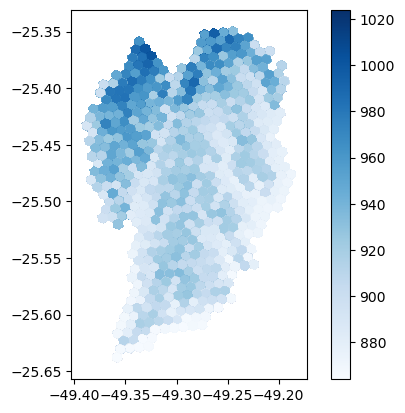

In [8]:
gdf_curitiba_hex.plot(column="Elevation", cmap="Blues", legend=True)

In [9]:
gdf_curitiba_hex.to_csv("../dados/dados_curva_niveis.csv", index=False)

In [20]:
print(gdf_curitiba_hex.crs)

epsg:4326


In [21]:
gdf_curitiba_hex.head()

,date,score,hex,NOME,geometry,index_right,Id,Layer,Elevation
0,2020-05-18,100,88a831acc7fffff,BAIRRO NOVO,"POLYGON ((-49.27456 -25.53764, -49.27041 -25.5...",26422,0,RE_CURVA_MESTRA,905.0
1,2020-03-11,100,88a831ace1fffff,BAIRRO NOVO,"POLYGON ((-49.25623 -25.53586, -49.25208 -25.5...",26422,0,RE_CURVA_MESTRA,905.0
3,2020-07-12,100,88a831acc5fffff,BAIRRO NOVO,"POLYGON ((-49.26869 -25.54399, -49.26454 -25.5...",26422,0,RE_CURVA_MESTRA,905.0
4,2020-04-25,99,88a831acedfffff,BAIRRO NOVO,"POLYGON ((-49.25036 -25.54221, -49.24621 -25.5...",26422,0,RE_CURVA_MESTRA,905.0
5,2020-08-23,100,88a831acedfffff,BAIRRO NOVO,"POLYGON ((-49.25036 -25.54221, -49.24621 -25.5...",26422,0,RE_CURVA_MESTRA,905.0


In [25]:
df = pd.read_csv("../dados/dados_curva_niveis.csv")

gdf = gpd.GeoDataFrame(
    df,
    crs={'init': 'epsg:4326'},
    geometry=df["geometry"]
)

TypeError: Input must be valid geometry objects: POLYGON ((-49.27455781428023 -25.537638448045946, -49.270405175714615 -25.534930506545987, -49.27126354011573 -25.53040181434035, -49.27627444225334 -25.52858115114508, -49.2804269592526 -25.53128917959227, -49.27956869568991 -25.535817784277132, -49.27455781428023 -25.537638448045946))

AttributeError: 'DataFrame' object has no attribute 'crs'

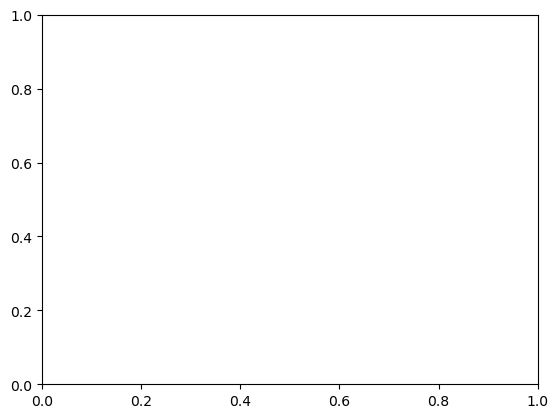

In [16]:
gdf.plot(column="Elevation", cmap="Blues", legend=True)

In [13]:
df.head()

,date,score,hex,NOME,geometry,index_right,Id,Layer,Elevation
0,2020-05-18,100,88a831acc7fffff,BAIRRO NOVO,POLYGON ((-49.27455781428023 -25.5376384480459...,26422,0,RE_CURVA_MESTRA,905.0
1,2020-03-11,100,88a831ace1fffff,BAIRRO NOVO,POLYGON ((-49.256230009114155 -25.535862749251...,26422,0,RE_CURVA_MESTRA,905.0
2,2020-07-12,100,88a831acc5fffff,BAIRRO NOVO,POLYGON ((-49.268688398995586 -25.543987102761...,26422,0,RE_CURVA_MESTRA,905.0
3,2020-04-25,99,88a831acedfffff,BAIRRO NOVO,POLYGON ((-49.25035995958426 -25.5422110506431...,26422,0,RE_CURVA_MESTRA,905.0
4,2020-08-23,100,88a831acedfffff,BAIRRO NOVO,POLYGON ((-49.25035995958426 -25.5422110506431...,26422,0,RE_CURVA_MESTRA,905.0


In [11]:
gdf_lagos = gpd.read_file('../dados/HIDRO_LAGOS_LAGOAS_REPRESAS')

gdf_lagos.head()

,TIPO,NOME,geometry
0,LAGO E LAGOA,None,"POLYGON ((667178.930 7166659.753, 667181.628 7..."
1,LAGO E LAGOA,None,"POLYGON ((666208.482 7166670.241, 666205.524 7..."
2,LAGO E LAGOA,None,"POLYGON ((668908.545 7166694.753, 668905.627 7..."
3,LAGO E LAGOA,None,"POLYGON ((668910.551 7166713.356, 668908.180 7..."
4,LAGO E LAGOA,None,"POLYGON ((667381.439 7166753.137, 667379.191 7..."


<AxesSubplot: >

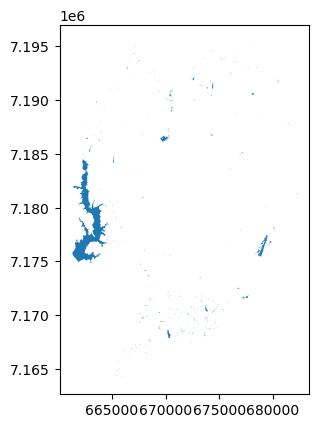

In [12]:
gdf_lagos.plot()

<AxesSubplot: >

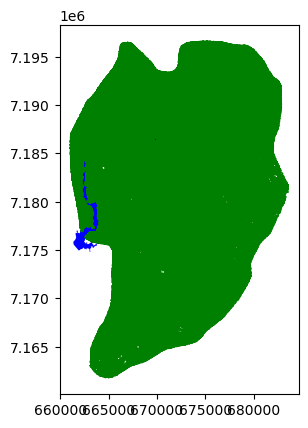

In [13]:
ax = gdf_curitiba.plot(color='g')
gdf_lagos.plot(ax = ax, color = 'b')

In [14]:
gdf_lagos_hex = gpd.GeoDataFrame(
    gdf_lagos)
gdf_lagos_hex = gdf_lagos_hex.to_crs(df_places.crs)
gdf_lagos_hex = df_places.sjoin(gdf_lagos_hex)

<AxesSubplot: >

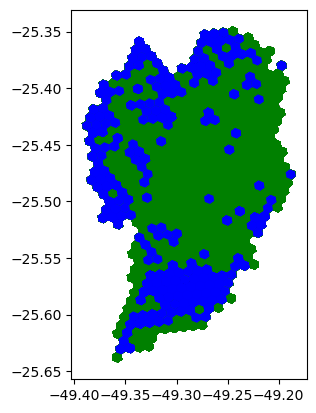

In [15]:
ax = gdf_curitiba_hex.plot(color='g')
gdf_lagos_hex.plot(ax = ax, color = 'b')

In [16]:
gdf_rios = gpd.read_file('../dados/HIDRO_RIOS_LN')

gdf_rios.head()

,TIPO,NOME,geometry
0,RIO,None,"LINESTRING (678427.895 7189718.951, 678437.855..."
1,RIO,None,"LINESTRING (679736.296 7192261.492, 679744.236..."
2,RIO,None,"LINESTRING (678776.475 7191046.272, 678764.435..."
3,RIO,None,"LINESTRING (678680.496 7192859.454, 678683.526..."
4,RIO,None,"LINESTRING (679339.086 7192443.652, 679342.486..."


<AxesSubplot: >

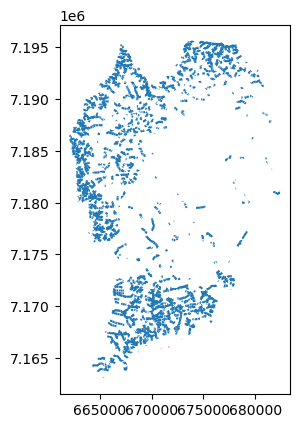

In [17]:
gdf_rios.plot()

In [18]:
gdf_rios_hex = gpd.GeoDataFrame(
    gdf_rios)
gdf_rios_hex = gdf_rios_hex.to_crs(df_places.crs)
gdf_rios_hex = df_places.sjoin(gdf_rios_hex)

<AxesSubplot: >

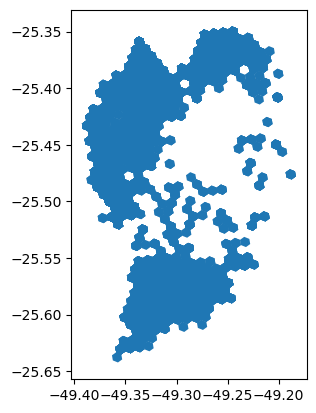

In [19]:
gdf_rios_hex.plot()

In [20]:
gdf_cavas = gpd.read_file('../dados/HIDRO_CAVAS_E_VARZEAS')

gdf_cavas.head()

,TIPO,NOME,geometry
0,CAVA E VÁRZEA,None,"POLYGON ((665079.262 7162611.745, 665079.947 7..."
1,CAVA E VÁRZEA,None,"POLYGON ((665101.916 7162854.677, 665103.291 7..."
2,CAVA E VÁRZEA,None,"POLYGON ((664777.575 7163349.106, 664779.158 7..."
3,CAVA E VÁRZEA,None,"POLYGON ((664887.953 7163390.325, 664881.868 7..."
4,CAVA E VÁRZEA,None,"POLYGON ((664732.378 7163470.230, 664727.351 7..."


<AxesSubplot: >

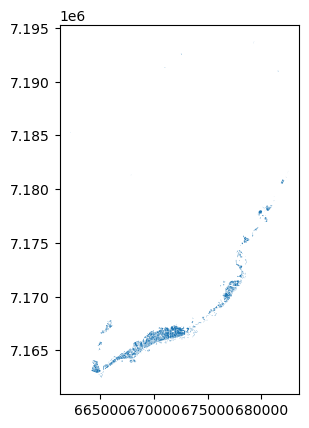

In [21]:
gdf_cavas.plot()

In [22]:
gdf_cavas_hex = gpd.GeoDataFrame(
    gdf_cavas)
gdf_cavas_hex = gdf_cavas_hex.to_crs(df_places.crs)
gdf_cavas_hex = df_places.sjoin(gdf_cavas_hex)

<AxesSubplot: >

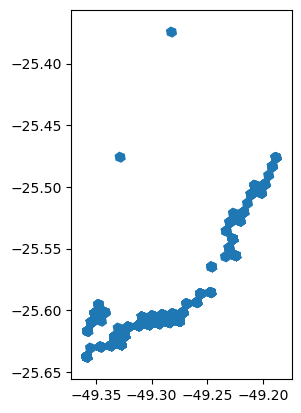

In [23]:
gdf_cavas_hex.plot()

In [28]:
gdf_rios_hex.loc[gdf_rios_hex["TIPO"] == "RIO", "rio"] = 1
gdf_lagos_hex.loc[gdf_lagos_hex["TIPO"] == "LAGO E LAGOA", "lago"] = 1
gdf_cavas_hex.loc[gdf_cavas_hex["TIPO"] == "CAVA E VÁRZEA", "cava"] = 1

In [29]:
gdf_merged = gdf_rios_hex.merge(gdf_lagos_hex, on="geometry")

In [30]:
gdf_merged[:5]

,date_x,score_x,hex_x,NOME_left_x,geometry,index_right_x,TIPO_x,NOME_right_x,count_x,rio,date_y,score_y,hex_y,NOME_left_y,index_right_y,TIPO_y,NOME_right_y,count_y,lago
0,2020 -07 -24,99,88a831aea3fffff,BAIRRO NOVO,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",1022,RIO,None,1.0,1.0,2020 -07 -24,99,88a831aea3fffff,BAIRRO NOVO,402,LAGO E LAGOA,None,1.0,1.0
1,2020 -07 -24,99,88a831aea3fffff,BAIRRO NOVO,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",1022,RIO,None,1.0,1.0,2020 -04 -21,100,88a831aea3fffff,BAIRRO NOVO,402,LAGO E LAGOA,None,1.0,1.0
2,2020 -07 -24,99,88a831aea3fffff,BAIRRO NOVO,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",1022,RIO,None,1.0,1.0,2020 -07 -24,99,88a831aea3fffff,BAIRRO NOVO,384,LAGO E LAGOA,None,1.0,1.0
3,2020 -07 -24,99,88a831aea3fffff,BAIRRO NOVO,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",1022,RIO,None,1.0,1.0,2020 -04 -21,100,88a831aea3fffff,BAIRRO NOVO,384,LAGO E LAGOA,None,1.0,1.0
4,2020 -04 -21,100,88a831aea3fffff,BAIRRO NOVO,"POLYGON ((-49.28444 -25.55934, -49.28029 -25.5...",1022,RIO,None,1.0,1.0,2020 -07 -24,99,88a831aea3fffff,BAIRRO NOVO,402,LAGO E LAGOA,None,1.0,1.0


<AxesSubplot: >

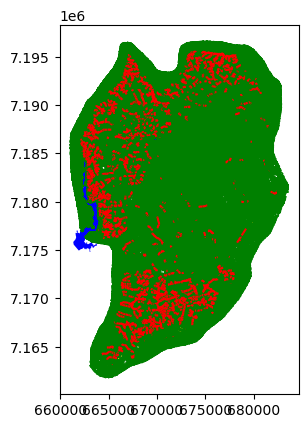

In [26]:
ax = gdf_curitiba.plot(color='g')
lagos = gdf_lagos.plot(ax = ax, color = 'b')
rios = gdf_rios.plot(ax = lagos, color = 'r')
gdf_cavas.plot(ax = rios, color = 'y')




<AxesSubplot: >

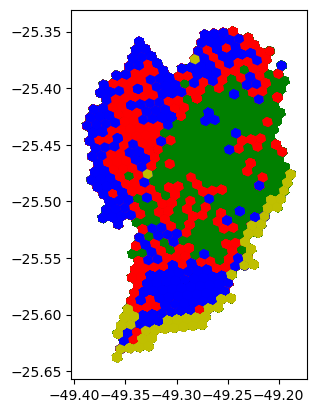

In [27]:
ax = gdf_curitiba_hex.plot(color='g')
rios = gdf_rios_hex.plot(ax = ax, color = 'r')
lagos = gdf_lagos_hex.plot(ax = rios, color = 'b')
gdf_cavas_hex.plot(ax = rios, color = 'y')